We have cleaned and shuffled our data let not see how well we can do with it.

## 1 

Import your necessary libraries.

In [1]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.neural_network import MLPClassifier

## 2 

Import our data.

In [2]:
full_X_train, full_y_train = np.load('X_train.npy'), np.load('y_train.npy')
X_test, y_test = np.load('X_test.npy'), np.load('y_test.npy')

full_X_train.shape, full_y_train.shape, X_test.shape, y_test.shape

((467, 30), (467,), (117, 30), (117,))

## 3 

Lets split our Train set into a train/dev(validation) set.

In [3]:
train_size = int(len(full_X_train) * 0.75)
X_train, y_train = full_X_train[:train_size], full_y_train[:train_size]
X_dev, y_dev = full_X_train[train_size:], full_y_train[train_size:]

X_train.shape, y_train.shape, X_dev.shape, y_dev.shape

((350, 30), (350,), (117, 30), (117,))

## 4 

Since this is classification, let's start with a Decision Tree and see how it does.

<br>

**4.1** Train "fit" the tree

Lets not change any parameters the first time to get a baseline of performance.

In [4]:
dtc = DecisionTreeClassifier(max_leaf_nodes=5, min_samples_split=20)
#
dtc.fit(X_train, y_train)
#
pred = dtc.predict(X_dev)
pred

array([1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0])

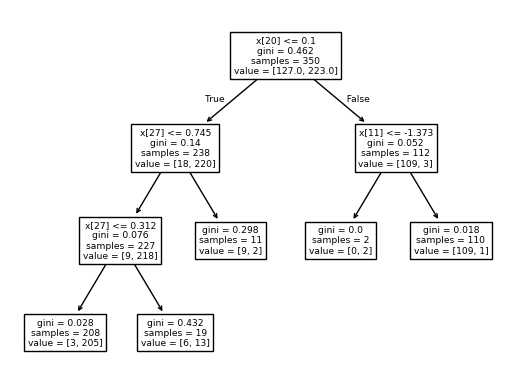

In [5]:
plot_tree(dtc);

**4.2** 

Evaluate the tree.

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        40
           1       0.97      0.96      0.97        77

    accuracy                           0.96       117
   macro avg       0.95      0.96      0.95       117
weighted avg       0.96      0.96      0.96       117



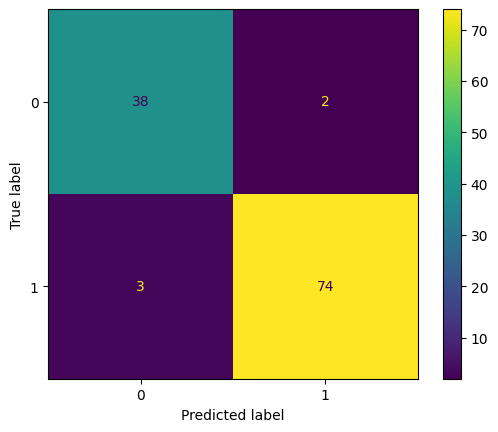

In [6]:
print(classification_report(y_dev, pred))
ConfusionMatrixDisplay.from_predictions(y_dev, pred);

**4.3**

Test the tree.

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        51
           1       0.91      0.95      0.93        66

    accuracy                           0.92       117
   macro avg       0.93      0.92      0.92       117
weighted avg       0.92      0.92      0.92       117



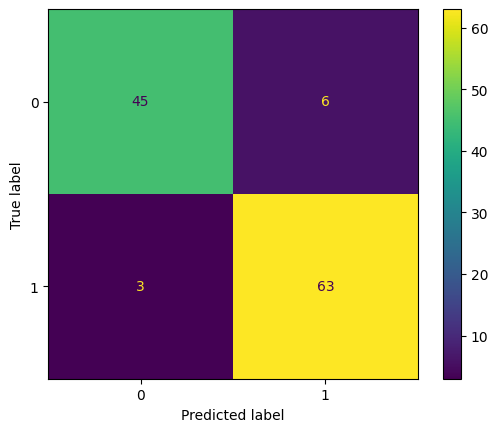

In [7]:
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))
ConfusionMatrixDisplay.from_predictions(y_test, pred);

## 5 

Lets repeate those steps but now lets make a random forest.

**5.1**

Create the Forest.

In [8]:
rfc = RandomForestClassifier(max_depth=5, min_samples_split=50)

**5.2**

Train the forest.

In [9]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=50)

**5.3**

Predict using our forest.

In [10]:
pred = rfc.predict(X_dev)

**5.4**

Evaluate the forest.

              precision    recall  f1-score   support

           0       0.90      0.95      0.93        40
           1       0.97      0.95      0.96        77

    accuracy                           0.95       117
   macro avg       0.94      0.95      0.94       117
weighted avg       0.95      0.95      0.95       117



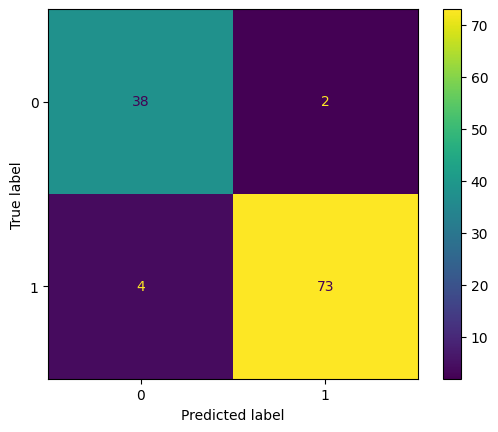

In [11]:
print(classification_report(y_dev, pred))
ConfusionMatrixDisplay.from_predictions(y_dev, pred);

**5.5**

Test the forest.

              precision    recall  f1-score   support

           0       0.94      0.88      0.91        51
           1       0.91      0.95      0.93        66

    accuracy                           0.92       117
   macro avg       0.93      0.92      0.92       117
weighted avg       0.92      0.92      0.92       117



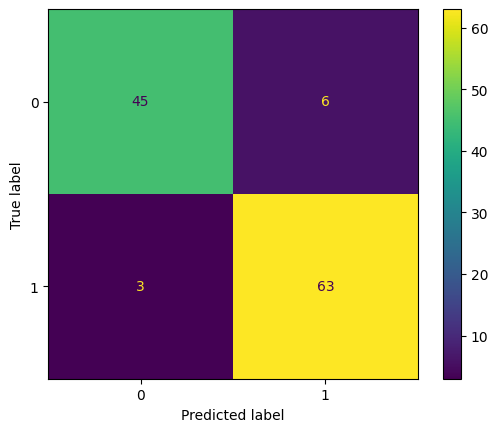

In [12]:
pred = dtc.predict(X_test)
print(classification_report(y_test, pred))
ConfusionMatrixDisplay.from_predictions(y_test, pred);

## 6

A NN in sklearn.

In [ ]:
# Create a simple neural network with one hidden layer
mlp = MLPClassifier(
    hidden_layer_sizes=(500,500,500),  # One hidden layer with 100 neurons
    max_iter=20-=[]0,             # Maximum iterations
    random_state=42,
    early_stopping=False, # Stop early if no improvement
    learning_rate_init=1e-2
)


In [14]:
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(500, 500, 500), learning_rate_init=0.01,
              max_iter=2000, random_state=42)

In [15]:
pred_mlp = mlp.predict(X_dev)

Neural Network Performance:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        40
           1       0.99      0.96      0.97        77

    accuracy                           0.97       117
   macro avg       0.96      0.97      0.96       117
weighted avg       0.97      0.97      0.97       117



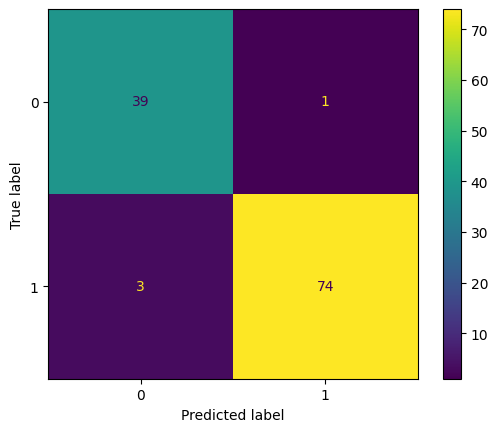

In [16]:
print("Neural Network Performance:")
print(classification_report(y_dev, pred_mlp))
ConfusionMatrixDisplay.from_predictions(y_dev, pred_mlp);

Neural Network Test Performance:
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        51
           1       0.92      1.00      0.96        66

    accuracy                           0.95       117
   macro avg       0.96      0.94      0.95       117
weighted avg       0.95      0.95      0.95       117



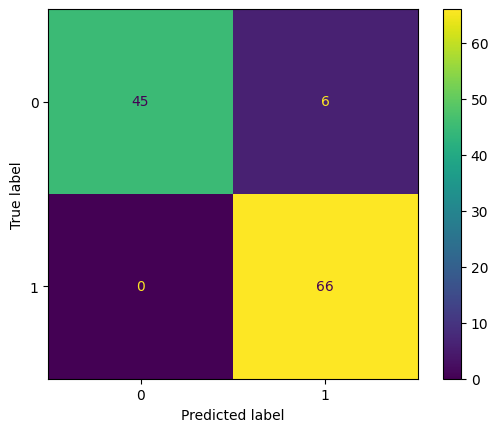

In [17]:
pred_mlp_test = mlp.predict(X_test)
print("Neural Network Test Performance:")
print(classification_report(y_test, pred_mlp_test))
ConfusionMatrixDisplay.from_predictions(y_test, pred_mlp_test);